In [1]:
# EDA and SMOTE on Preprocessed Air Quality Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [8]:
file_path = 'preprocessed_dataset_3rd iteration.csv'
df = pd.read_csv(file_path)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,Bengaluru,2015-03-21 00:00:00,48.59,103.22,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,91
1,Bengaluru,2015-03-22 00:00:00,47.38,103.22,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,120
2,Bengaluru,2015-03-23 00:00:00,65.65,103.22,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,154
3,Bengaluru,2015-03-24 00:00:00,60.47,103.22,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,119
4,Bengaluru,2015-03-25 00:00:00,62.56,103.22,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,232


In [9]:
print('Shape:', df.shape)
print('Data types:')
print(df.dtypes)
print('Basic statistics:')
display(df.describe(include='all'))

Shape: (10692, 14)
Data types:
City        object
Date        object
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
AQI          int64
dtype: object
Basic statistics:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,10692,10692,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000
unique,7,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Delhi,2018-04-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1999,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,60.916043,124.133008,16.704844,32.742016,32.759685,29.975529,1.190455,9.956173,38.100711,2.947528,8.750716,141.175832
std,NaN,NaN,54.192394,84.671050,22.154913,20.435520,30.504234,29.344694,2.049564,6.995563,21.220424,6.897386,12.564988,93.328886
min,NaN,NaN,1.720000,0.210000,0.400000,0.010000,0.000000,0.020000,0.000000,0.710000,0.100000,0.000000,0.000000,20.000000
25%,NaN,NaN,29.820000,77.757500,5.827500,17.670000,15.297500,13.797500,0.580000,5.340000,23.695000,0.520000,1.650000,80.000000
50%,NaN,NaN,46.440000,103.220000,9.420000,28.500000,24.090000,23.080000,0.850000,8.170000,34.530000,1.500000,5.010000,110.000000
75%,NaN,NaN,69.800000,137.795000,16.600000,42.350000,38.267500,35.342500,1.150000,12.472500,48.292500,3.430000,10.842500,164.000000


In [10]:
print('Missing values per column:')
print(df.isnull().sum())

# Use city names as target
target_col = 'City' if 'City' in df.columns else df.columns[0]
if target_col in df.columns:
    print(f'Class distribution in {target_col}:')
    print(df[target_col].value_counts())
else:
    print('No city column found.')

Missing values per column:
City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64
Class distribution in City:
City
Delhi            1999
Bengaluru        1910
Chennai          1884
Hyderabad        1880
Visakhapatnam    1171
Jaipur           1094
Kolkata           754
Name: count, dtype: int64


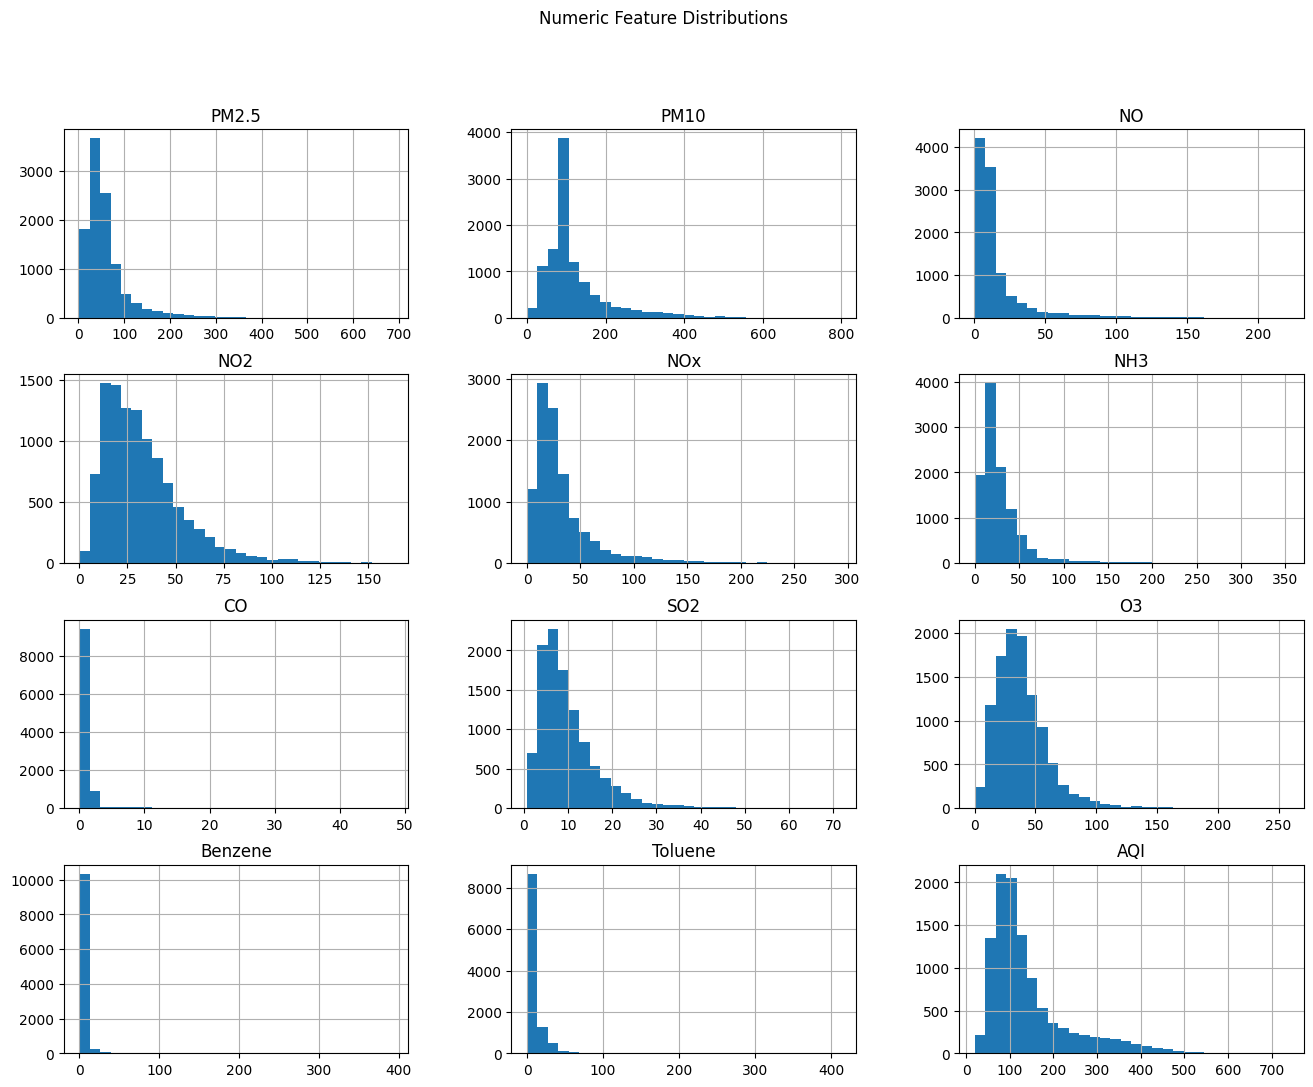

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle('Numeric Feature Distributions')
plt.show()

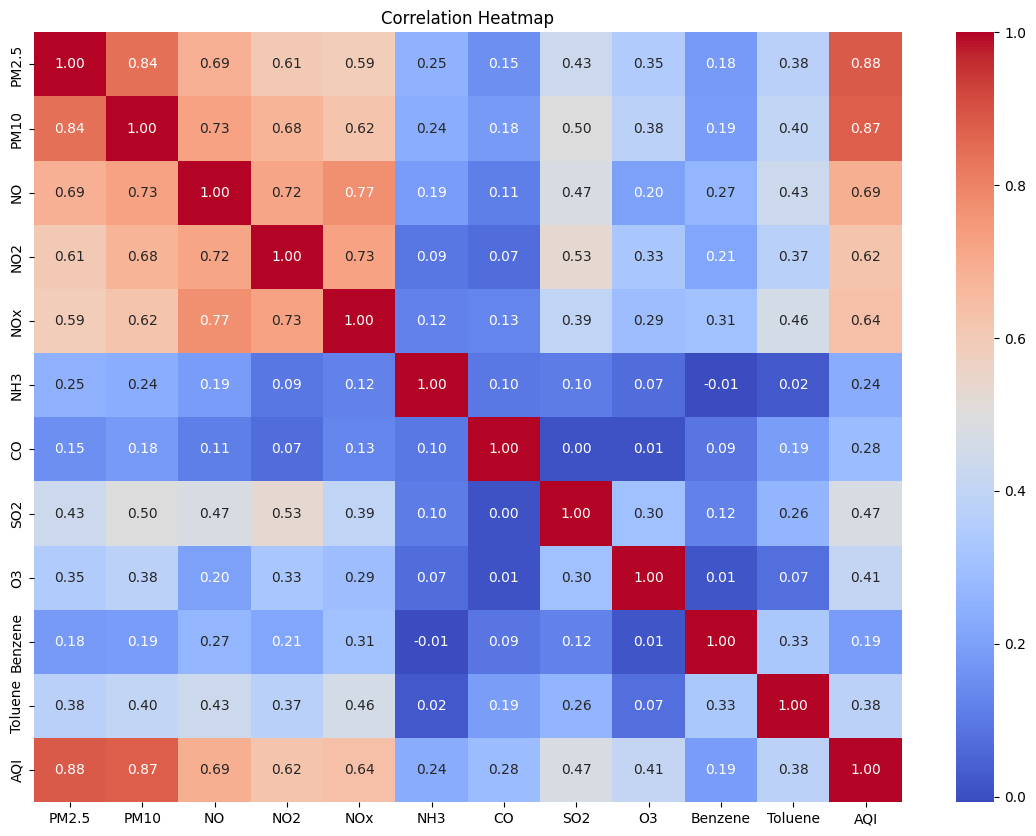

In [12]:
plt.figure(figsize=(14, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Warn if high correlations
high_corr = (corr.abs() > 0.8) & (corr.abs() < 1.0)
if high_corr.sum().sum() > 0:
    print('Warning: Some features are highly correlated!')

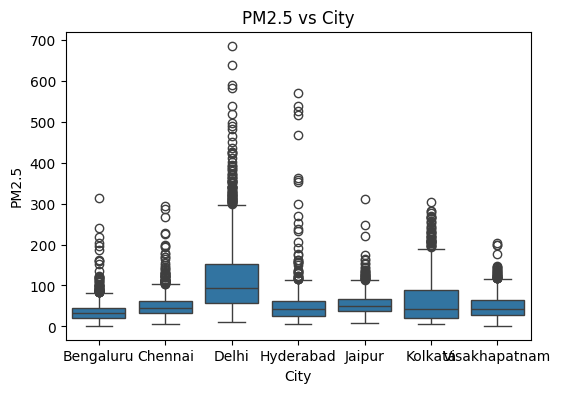

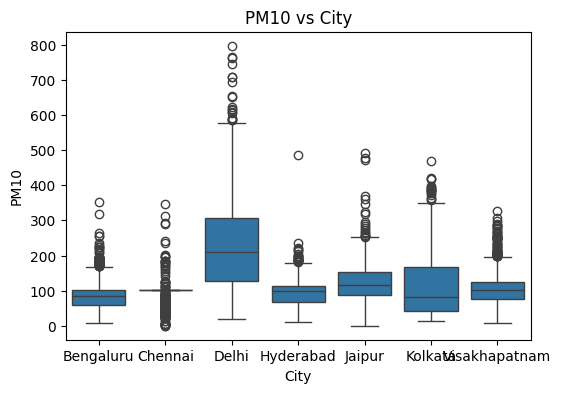

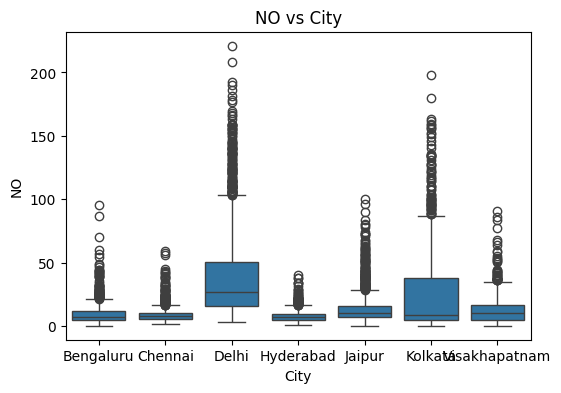

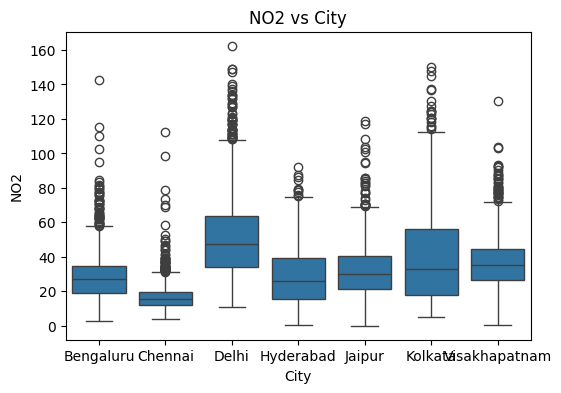

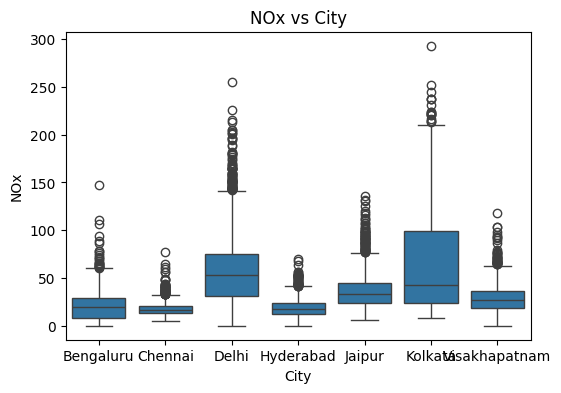

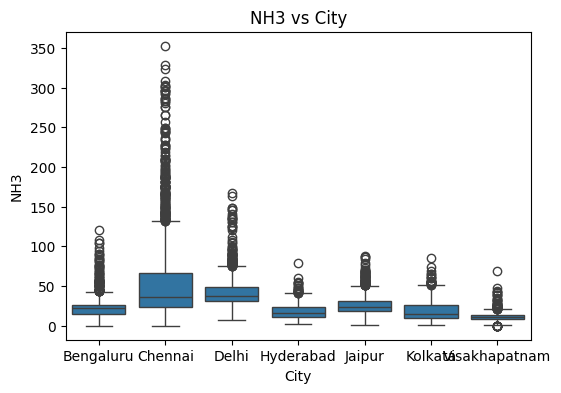

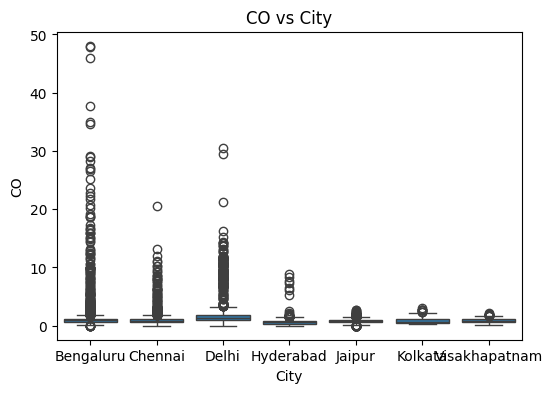

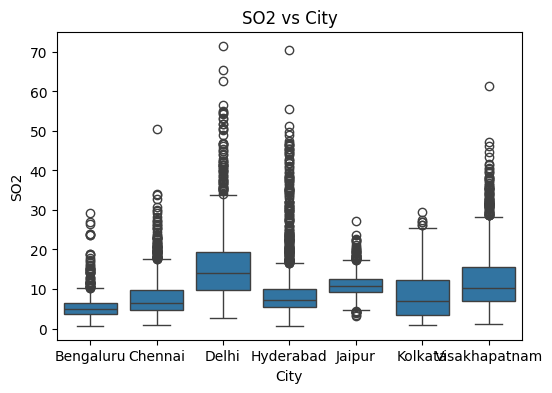

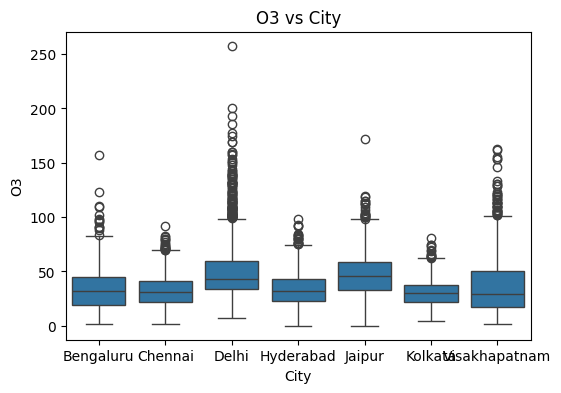

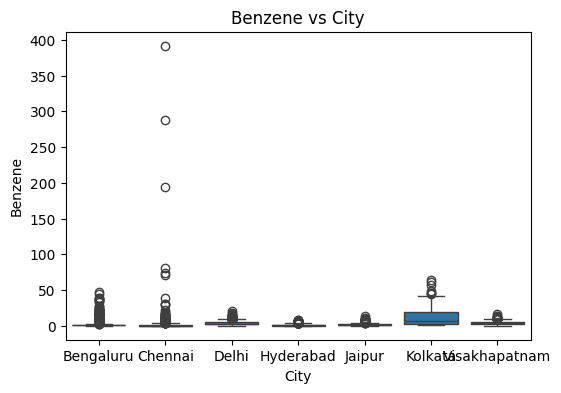

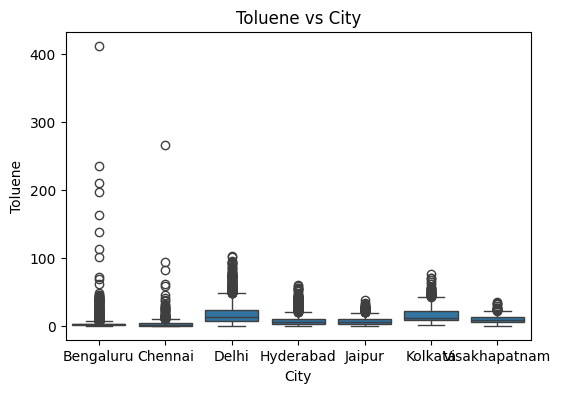

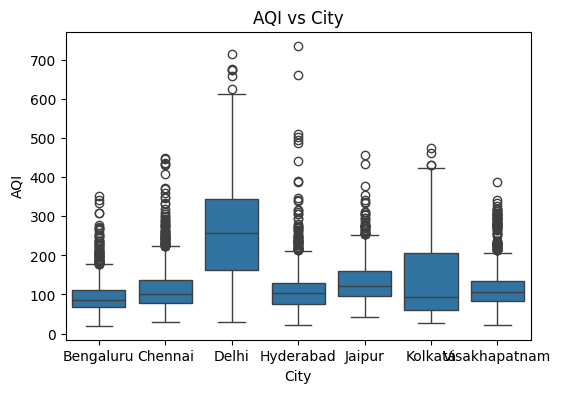

In [13]:
if target_col in df.columns:
    for col in numeric_cols:
        if col != target_col:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=df[target_col], y=df[col])
            plt.title(f'{col} vs {target_col}')
            plt.show()

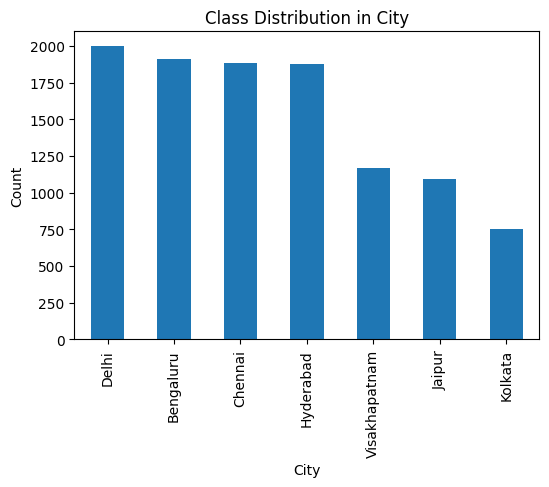

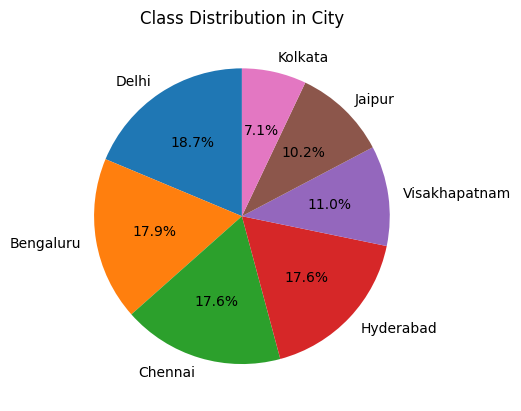

In [14]:
if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    df[target_col].value_counts().plot(kind='bar')
    plt.title(f'Class Distribution in {target_col}')
    plt.ylabel('Count')
    plt.show()
    df[target_col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Class Distribution in {target_col}')
    plt.ylabel('')
    plt.show()

Before SMOTE: Counter({np.int64(2): 1999, np.int64(0): 1910, np.int64(1): 1884, np.int64(3): 1880, np.int64(6): 1171, np.int64(4): 1094, np.int64(5): 754})
After SMOTE: Counter({np.int64(0): 1999, np.int64(1): 1999, np.int64(2): 1999, np.int64(3): 1999, np.int64(4): 1999, np.int64(5): 1999, np.int64(6): 1999})


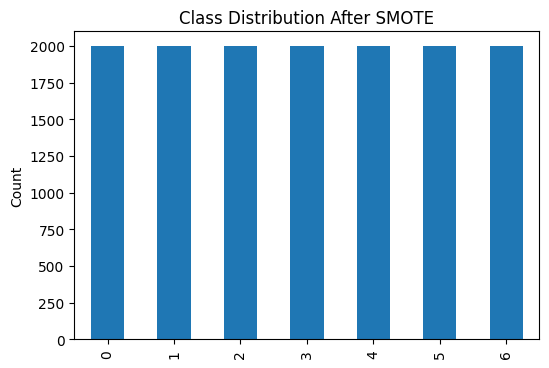

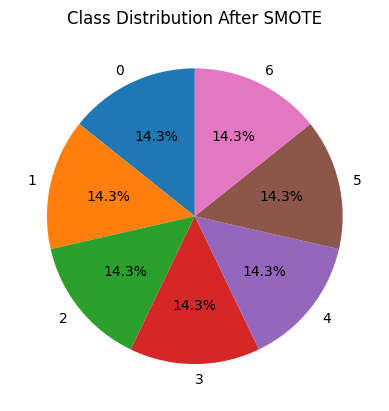

Balanced dataset saved as balanced_dataset.csv


In [15]:
if target_col in df.columns:
    # Encode city names
    y = df[target_col]
    if y.dtype == 'O' or str(y.dtype).startswith('category'):
        le = LabelEncoder()
        y_enc = le.fit_transform(y)
    else:
        y_enc = y
    X = df.drop(columns=[target_col])
    # Use only numeric features for SMOTE
    X_num = X.select_dtypes(include=[np.number])
    print('Before SMOTE:', Counter(y_enc))
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_num, y_enc)
    print('After SMOTE:', Counter(y_res))
    # Visualize after SMOTE
    plt.figure(figsize=(6, 4))
    pd.Series(y_res).value_counts().plot(kind='bar')
    plt.title('Class Distribution After SMOTE')
    plt.ylabel('Count')
    plt.show()
    pd.Series(y_res).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Class Distribution After SMOTE')
    plt.ylabel('')
    plt.show()
    # Save balanced dataset
    df_res = pd.DataFrame(X_res, columns=X_num.columns)
    df_res[target_col] = y_res if y.dtype != 'O' else le.inverse_transform(y_res)
    df_res.to_csv('balanced_dataset.csv', index=False)
    print('Balanced dataset saved as balanced_dataset.csv')
else:
    print('No city column found for SMOTE.')

In [16]:
# Load original dataset
df_orig = pd.read_csv('preprocessed_dataset_3rd iteration.csv')

# Load balanced dataset (created after SMOTE)
df_bal = pd.read_csv('balanced_dataset.csv')

In [17]:
print("Total samples before SMOTE:", len(df_orig))
print("Total samples after SMOTE:", len(df_bal))

Total samples before SMOTE: 10692
Total samples after SMOTE: 13993


In [19]:
before_counts = df_orig['City'].value_counts().sort_index()
after_counts = df_bal['City'].value_counts().sort_index()
comparison = pd.DataFrame({'Before SMOTE': before_counts, 'After SMOTE': after_counts})
print(comparison)

               Before SMOTE  After SMOTE
City                                    
Bengaluru              1910         1999
Chennai                1884         1999
Delhi                  1999         1999
Hyderabad              1880         1999
Jaipur                 1094         1999
Kolkata                 754         1999
Visakhapatnam          1171         1999
